Code to visualize output for the couriers problem.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch, Path, Arrow
from matplotlib.ticker import MaxNLocator
import random

import os
import sys
import re

In [2]:
# Read instance and extract data
lines = []
with open("../in/pdf.dzn") as f: #INSERT INSTANCE FILE HERE
    for line in f:
        line = re.sub("[^0123456789\.\ -]","",line)
        line = line.strip()
        lines.append(line)
# line 1: m
m = int(lines[0])
n = int(lines[1])
capacities = [int(s) for s in lines[2].split()]
weigths = [int(s) for s in lines[3].split()]
instancedx = [int(s) for s in lines[4].split()]
instancedy = [int(s) for s in lines[5].split()]

instance = {'m': m, 'n':n, 'capacities':capacities, 'weigths':weigths, 'instancedx':instancedx, 'instancedy':instancedy}
print(instance)

{'m': 3, 'n': 7, 'capacities': [15, 10, 7], 'weigths': [3, 2, 6, 8, 5, 4, 4], 'instancedx': [1, 2, 2, 4, 5, 5, 6, 3], 'instancedy': [3, 1, 5, 0, 2, 5, 4, 3]}


In [3]:
#INSERT SOLUTION HERE
solution = [[0, 3, 6, 5, 0], [0, 4, 2, 0], [0, 1, 7, 0]]
solution = [[x if x!=0 else n+1 for x in tour] for tour in solution]
print(solution)
solution_coord = []
for tour in solution:
    tour_coord = []
    for package in tour:
        tour_coord.append((instancedx[package-1],instancedy[package-1]))
    solution_coord.append(tour_coord)

[[8, 3, 6, 5, 8], [8, 4, 2, 8], [8, 1, 7, 8]]


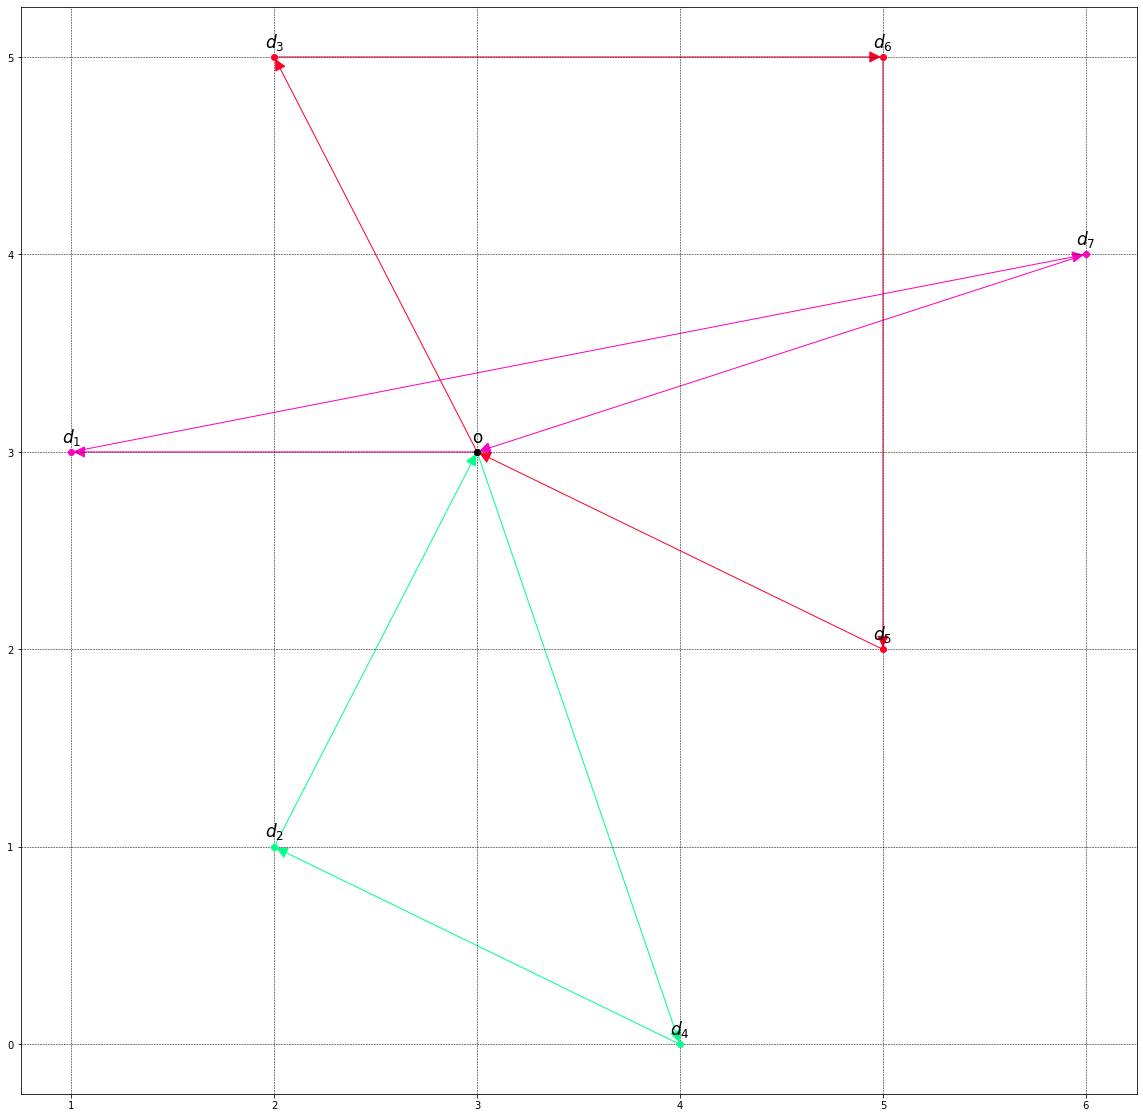

In [4]:
def plot_solution(instance, solution_coord):

    instancedx = instance['instancedx']
    instancedy = instance['instancedy']
    m = instance['m']
    n = instance['n']

    plt.rcParams["figure.figsize"] = (20,20)
    fig, ax = plt.subplots()
    ax.yaxis.set_major_locator(MaxNLocator(nbins='auto',integer=True))
    ax.xaxis.set_major_locator(MaxNLocator(nbins='auto',integer=True))
    ax.grid(color='#000000', linestyle='--', linewidth=0.5)
    ax.autoscale(enable=True, axis='both', tight=False)

    # annotates the point names
    i = 0 #labelcount
    for i in range(n+1):
        label = f"$d_{{{i+1}}}$"
        if i==n:
            label = 'o'
        ax.annotate(label, # this is the text
                (instancedx[i],instancedy[i]), # these are the coordinates to position the label
                textcoords="offset points", # how to position the text
                xytext=(0,10), # distance from text to points (x,y)
                ha='center', # horizontal alignment can be left, right or center
                **{'fontsize':17, })

    # gets m random colors
    number_of_colors = m
    #color_gen = iter(["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
    #         for i in range(number_of_colors)])


    color_map = plt.cm.get_cmap('gist_rainbow', number_of_colors)
    color_gen = iter(color_map(np.arange(0,1,1/number_of_colors)))

    for tour in solution_coord:
        # picks the next color
        color = color_gen.__next__()
        for i in range(len(tour)-1):
            # draws an arrow from each node to the other in the tour
            current = tour[i]
            next = tour[i+1]
            arrow = FancyArrowPatch(posA=current, posB=next, arrowstyle='-|>,head_length=10,head_width=5',
                **{'color':color})
            ax.add_patch(arrow)
            # draws the point
            ax.plot(current[0],current[1], marker="o", color=color)

    # draws the origin at the end
    ax.plot(instancedx[-1],instancedy[-1], marker="o", color="black")

    #potentially save to a file?

    plt.show()


plot_solution(instance, solution_coord)